# アタポン
* アタポンの2001位データに絞る
* ちょうど毎月開催されてるので、月次にしてみる
  * 「月の中で何日に開催された」とかは一旦考慮しない
* トレンドからズレているものを確認し、影響が大きい要因を考える

## インポート

In [37]:
import numpy as np
import pandas as pd
import pickle
import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=['IPAMincho'])

import pystan

## イベントデータ読み込み

In [38]:
input_common_dir = '../../common/event_data/'

In [39]:
df = pd.read_pickle(input_common_dir + 'a3_output_df.pkl')
df = df.drop('1位', axis=1)
df = df[df['形式'] == 'アタポン'].set_index('日付')
df

,イベント,2001位,形式,属性,期間
日付,,,,,
2015-09-25,アタシポンコツアンドロイド,78330,アタポン,NaN,249.0
2015-10-19,Nation Blue,67627,アタポン,NaN,198.0
2015-11-20,Orange Sapphire,42944,アタポン,NaN,150.0
2015-12-18,Snow Wings,50954,アタポン,NaN,222.0
2016-01-20,パステルピンクな恋,43854,アタポン,NaN,174.0
2016-02-18,オルゴールの小箱,56737,アタポン,NaN,174.0
2016-03-20,絶対特権主張しますっ！,51353,アタポン,NaN,174.0
2016-04-19,つぼみ,47907,アタポン,NaN,174.0
2016-05-19,明日また会えるよね,58517,アタポン,NaN,198.0


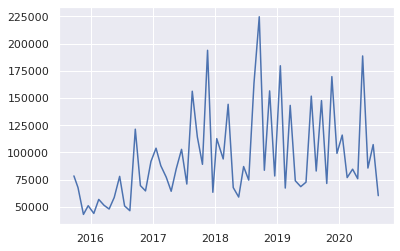

In [40]:
# プロットしてみる
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.index
y = df.loc[:, '2001位']
ax.plot(x, y)
plt.show()

## トレンドデータ読み込み
* ローカル線形トレンドモデルでのトレンドデータ

In [41]:
# ローカル線形トレンドモデルのデータを読み込む
input_dir = '../event_data/'
with open(input_dir + 'c3_model.pickle', mode="rb") as f:
    stm = pickle.load(f)
with open(input_dir + 'c3_fit.pickle', mode="rb") as f:
    fit = pickle.load(f)

In [42]:
fit

Inference for Stan model: anon_model_6756962f483cdcec6d2c866a76ea3170.
3 chains, each with iter=4000; warmup=3000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]      4.6e4  1362.8  2.2e4 4113.1  3.1e4  4.7e4  6.1e4  9.1e4    261   1.01
mu[1]      4.8e4  1231.1  1.9e4  1.0e4  3.6e4  4.9e4  6.1e4  8.5e4    245   1.01
mu[2]      5.0e4  1163.4  1.7e4  1.4e4  3.8e4  5.0e4  6.2e4  8.2e4    221   1.01
mu[3]      5.2e4  1111.7  1.6e4  1.7e4  4.1e4  5.2e4  6.3e4  8.1e4    206   1.02
mu[4]      5.3e4  1052.1  1.5e4  2.2e4  4.3e4  5.4e4  6.4e4  8.0e4    205   1.02
mu[5]      5.6e4  1004.6  1.4e4  2.6e4  4.6e4  5.6e4  6.5e4  8.1e4    198   1.02
mu[6]      5.8e4  930.17  1.3e4  3.0e4  4.9e4  5.8e4  6.7e4  8.2e4    209   1.02
mu[7]      6.0e4  866.41  1.3e4  3.4e4  5.2e4  6.0e4  6.8e4  8.4e4    224   1.02
mu[8]      6.2e4  775.91  1.2e4  3.9e4  5.4e4  6.2e4  7.1e4  8.6e4    257   1.02
m

In [43]:
df_trend = pd.DataFrame({
    '日付': df.index,
    'トレンド': fit['mu'].mean(axis=0)
}).set_index('日付')
df_trend

,トレンド
日付,
2015-09-25,46356.520398
2015-10-19,48239.684320
2015-11-20,49739.440359
2015-12-18,51545.587208
2016-01-20,53310.761728
2016-02-18,55592.576056
2016-03-20,57739.577172
2016-04-19,59910.798724
2016-05-19,62367.406181


## 実データ-トレンド比較

In [44]:
df = df.join(df_trend)
df

,イベント,2001位,形式,属性,期間,トレンド
日付,,,,,,
2015-09-25,アタシポンコツアンドロイド,78330,アタポン,NaN,249.0,46356.520398
2015-10-19,Nation Blue,67627,アタポン,NaN,198.0,48239.684320
2015-11-20,Orange Sapphire,42944,アタポン,NaN,150.0,49739.440359
2015-12-18,Snow Wings,50954,アタポン,NaN,222.0,51545.587208
2016-01-20,パステルピンクな恋,43854,アタポン,NaN,174.0,53310.761728
2016-02-18,オルゴールの小箱,56737,アタポン,NaN,174.0,55592.576056
2016-03-20,絶対特権主張しますっ！,51353,アタポン,NaN,174.0,57739.577172
2016-04-19,つぼみ,47907,アタポン,NaN,174.0,59910.798724
2016-05-19,明日また会えるよね,58517,アタポン,NaN,198.0,62367.406181


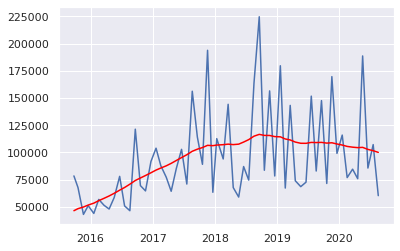

In [45]:
# mu
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df.index, df['2001位'], label='observed')
ax.plot(df.index, df['トレンド'], label='trend', c='red')
plt.show()

In [48]:
df['差'] = df['2001位'] - df['トレンド']
df['比'] = df['2001位'] / df['トレンド']
# 不要な列削除
df.drop(['形式', '属性'], axis=1, inplace=True)

In [49]:
df.describe()

,2001位,期間,トレンド,差,比
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,94924.383333,180.983333,93887.202508,1037.180825,1.012558
std,42349.249956,19.308812,21075.518367,36203.673879,0.356941
min,42944.000000,150.000000,46356.520398,-48642.291664,0.547721
25%,67515.750000,174.000000,80600.777252,-26350.480288,0.725746
50%,80589.500000,174.000000,104505.582522,-7243.114739,0.898864
75%,112983.000000,198.000000,108587.024458,19570.663739,1.251577
max,224697.000000,249.000000,116547.185524,108149.814476,1.927949


In [50]:
# 差が大きい順
df.sort_values('差', ascending=False)

,イベント,2001位,期間,トレンド,差,比
日付,,,,,,
2018-09-19,Pretty Liar,224697,198.0,116547.185524,108149.814476,1.927949
2017-11-19,Trinity Field,193847,174.0,106467.615442,87379.384558,1.820713
2020-05-19,不埒なCANVAS,188652,198.0,104595.363939,84056.636061,1.803636
2019-01-21,スパイスパラダイス,179632,174.0,114279.718658,65352.281342,1.571862
2019-11-20,Secret Daybreak,169639,175.0,108814.583507,60824.416493,1.558973
2017-08-21,双翼の独奏歌,156206,150.0,101000.799190,55205.200810,1.546582
2018-08-19,クレイジークレイジー,163641,198.0,114876.585009,48764.414991,1.424494
2016-09-20,ラブレター,121303,150.0,74137.971944,47165.028056,1.636179
2019-07-22,バベル,151703,157.0,109154.524185,42548.475815,1.389800


In [51]:
# 比が大きい順10イベント
df.sort_values('比', ascending=False)

,イベント,2001位,期間,トレンド,差,比
日付,,,,,,
2018-09-19,Pretty Liar,224697,198.0,116547.185524,108149.814476,1.927949
2017-11-19,Trinity Field,193847,174.0,106467.615442,87379.384558,1.820713
2020-05-19,不埒なCANVAS,188652,198.0,104595.363939,84056.636061,1.803636
2015-09-25,アタシポンコツアンドロイド,78330,249.0,46356.520398,31973.479602,1.689730
2016-09-20,ラブレター,121303,150.0,74137.971944,47165.028056,1.636179
2019-01-21,スパイスパラダイス,179632,174.0,114279.718658,65352.281342,1.571862
2019-11-20,Secret Daybreak,169639,175.0,108814.583507,60824.416493,1.558973
2017-08-21,双翼の独奏歌,156206,150.0,101000.799190,55205.200810,1.546582
2018-08-19,クレイジークレイジー,163641,198.0,114876.585009,48764.414991,1.424494


In [52]:
# 差が大きい順10イベント
df.sort_values('差', ascending=False).head(10)

,イベント,2001位,期間,トレンド,差,比
日付,,,,,,
2018-09-19,Pretty Liar,224697,198.0,116547.185524,108149.814476,1.927949
2017-11-19,Trinity Field,193847,174.0,106467.615442,87379.384558,1.820713
2020-05-19,不埒なCANVAS,188652,198.0,104595.363939,84056.636061,1.803636
2019-01-21,スパイスパラダイス,179632,174.0,114279.718658,65352.281342,1.571862
2019-11-20,Secret Daybreak,169639,175.0,108814.583507,60824.416493,1.558973
2017-08-21,双翼の独奏歌,156206,150.0,101000.799190,55205.200810,1.546582
2018-08-19,クレイジークレイジー,163641,198.0,114876.585009,48764.414991,1.424494
2016-09-20,ラブレター,121303,150.0,74137.971944,47165.028056,1.636179
2019-07-22,バベル,151703,157.0,109154.524185,42548.475815,1.389800


In [53]:
# 比が大きい順10イベント
df.sort_values('比', ascending=False).head(10)

,イベント,2001位,期間,トレンド,差,比
日付,,,,,,
2018-09-19,Pretty Liar,224697,198.0,116547.185524,108149.814476,1.927949
2017-11-19,Trinity Field,193847,174.0,106467.615442,87379.384558,1.820713
2020-05-19,不埒なCANVAS,188652,198.0,104595.363939,84056.636061,1.803636
2015-09-25,アタシポンコツアンドロイド,78330,249.0,46356.520398,31973.479602,1.689730
2016-09-20,ラブレター,121303,150.0,74137.971944,47165.028056,1.636179
2019-01-21,スパイスパラダイス,179632,174.0,114279.718658,65352.281342,1.571862
2019-11-20,Secret Daybreak,169639,175.0,108814.583507,60824.416493,1.558973
2017-08-21,双翼の独奏歌,156206,150.0,101000.799190,55205.200810,1.546582
2018-08-19,クレイジークレイジー,163641,198.0,114876.585009,48764.414991,1.424494


In [54]:
# 差が小さい順10イベント
df.sort_values('差', ascending=True).head(10)

,イベント,2001位,期間,トレンド,差,比
日付,,,,,,
2018-05-21,HARURUNRUN,58907,174.0,107549.291664,-48642.291664,0.547721
2019-02-19,Needle Light,67182,150.0,112314.153465,-45132.153465,0.598161
2017-12-20,冬空プレシャス,63299,174.0,106162.643520,-42863.643520,0.596246
2019-05-21,Max Beat,68476,174.0,108358.848414,-39882.848414,0.631937
2020-08-19,ヒーローヴァーサスレイナンジョー,60211,174.0,99987.279449,-39776.279449,0.602187
2018-04-19,Spring Screaming,67629,174.0,107128.896159,-39499.896159,0.631286
2018-07-19,SUN♡FLOWER,74511,198.0,111715.698890,-37204.698890,0.666970
2019-10-21,空想探査計画,71393,174.0,108511.171441,-37118.171441,0.657932
2018-12-19,Trust me,78278,198.0,114500.281063,-36222.281063,0.683649


In [55]:
# 比が小さい順10イベント
df.sort_values('比', ascending=True).head(10)

,イベント,2001位,期間,トレンド,差,比
日付,,,,,,
2018-05-21,HARURUNRUN,58907,174.0,107549.291664,-48642.291664,0.547721
2017-12-20,冬空プレシャス,63299,174.0,106162.643520,-42863.643520,0.596246
2019-02-19,Needle Light,67182,150.0,112314.153465,-45132.153465,0.598161
2020-08-19,ヒーローヴァーサスレイナンジョー,60211,174.0,99987.279449,-39776.279449,0.602187
2018-04-19,Spring Screaming,67629,174.0,107128.896159,-39499.896159,0.631286
2019-05-21,Max Beat,68476,174.0,108358.848414,-39882.848414,0.631937
2016-08-19,Near to You,46355,198.0,70732.934272,-24377.934272,0.655352
2019-10-21,空想探査計画,71393,174.0,108511.171441,-37118.171441,0.657932
2018-07-19,SUN♡FLOWER,74511,198.0,111715.698890,-37204.698890,0.666970


* 差、比が大きいTop10の両方に入っているイベント
  * Pretty Liar
  * Trinity Field
  * 不埒なCANVAS
  * スパイスパラダイス
  * Secret Daybreak
  * 双翼の独奏歌
  * クレイジークレイジー
  * ラブレター
* 差、比が小さいTop10の両方に入っているイベント
  * HARURUNRUN
  * Needle Light
  * 冬空プレシャス
  * Max Beat
  * ヒーローヴァーサスレイナンジョー
  * Spring Screaming
  * SUN♡FLOWER
  * 空想探査計画
  * TAKAMARI☆CLIMAXXX！！！！！

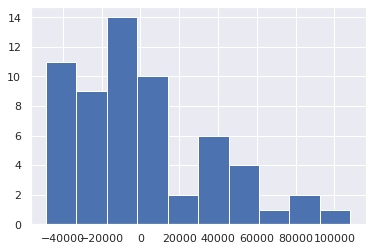

In [56]:
df['差'].hist()

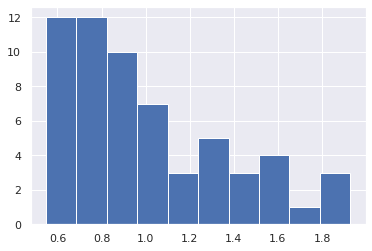

In [57]:
df['比'].hist()

C:\Users\kazuy\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kazuy\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kazuy\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kazuy\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0, flags=flags)


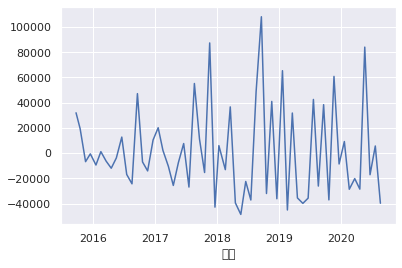

In [58]:
df['差'].plot()

C:\Users\kazuy\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kazuy\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kazuy\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kazuy\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0, flags=flags)


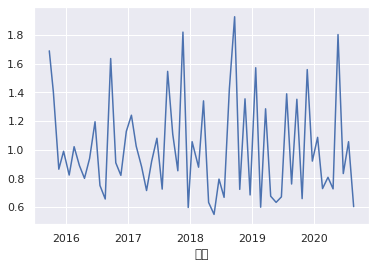

In [59]:
df['比'].plot()

In [60]:
# 日付も変数にする
df.reset_index(inplace=True)

In [61]:
df['year'] = df['日付'].apply(lambda x: x.year)
df['month'] = df['日付'].apply(lambda x: x.month)
df['day'] = df['日付'].apply(lambda x: x.day)

In [63]:
df.corr()

,2001位,期間,トレンド,差,比,year,month,day
2001位,1.000000,-0.043406,0.519270,0.867464,0.827614,0.353180,0.082353,0.028599
期間,-0.043406,1.000000,-0.171487,0.049054,0.094436,-0.115226,0.115865,0.117452
トレンド,0.519270,-0.171487,1.000000,0.025278,-0.019180,0.806386,-0.029145,-0.068717
差,0.867464,0.049054,0.025278,1.000000,0.979266,-0.056296,0.113299,0.073457
比,0.827614,0.094436,-0.019180,0.979266,1.000000,-0.090318,0.137382,0.140327
year,0.353180,-0.115226,0.806386,-0.056296,-0.090318,1.000000,-0.259100,-0.009880
month,0.082353,0.115865,-0.029145,0.113299,0.137382,-0.259100,1.000000,0.203199
day,0.028599,0.117452,-0.068717,0.073457,0.140327,-0.009880,0.203199,1.000000


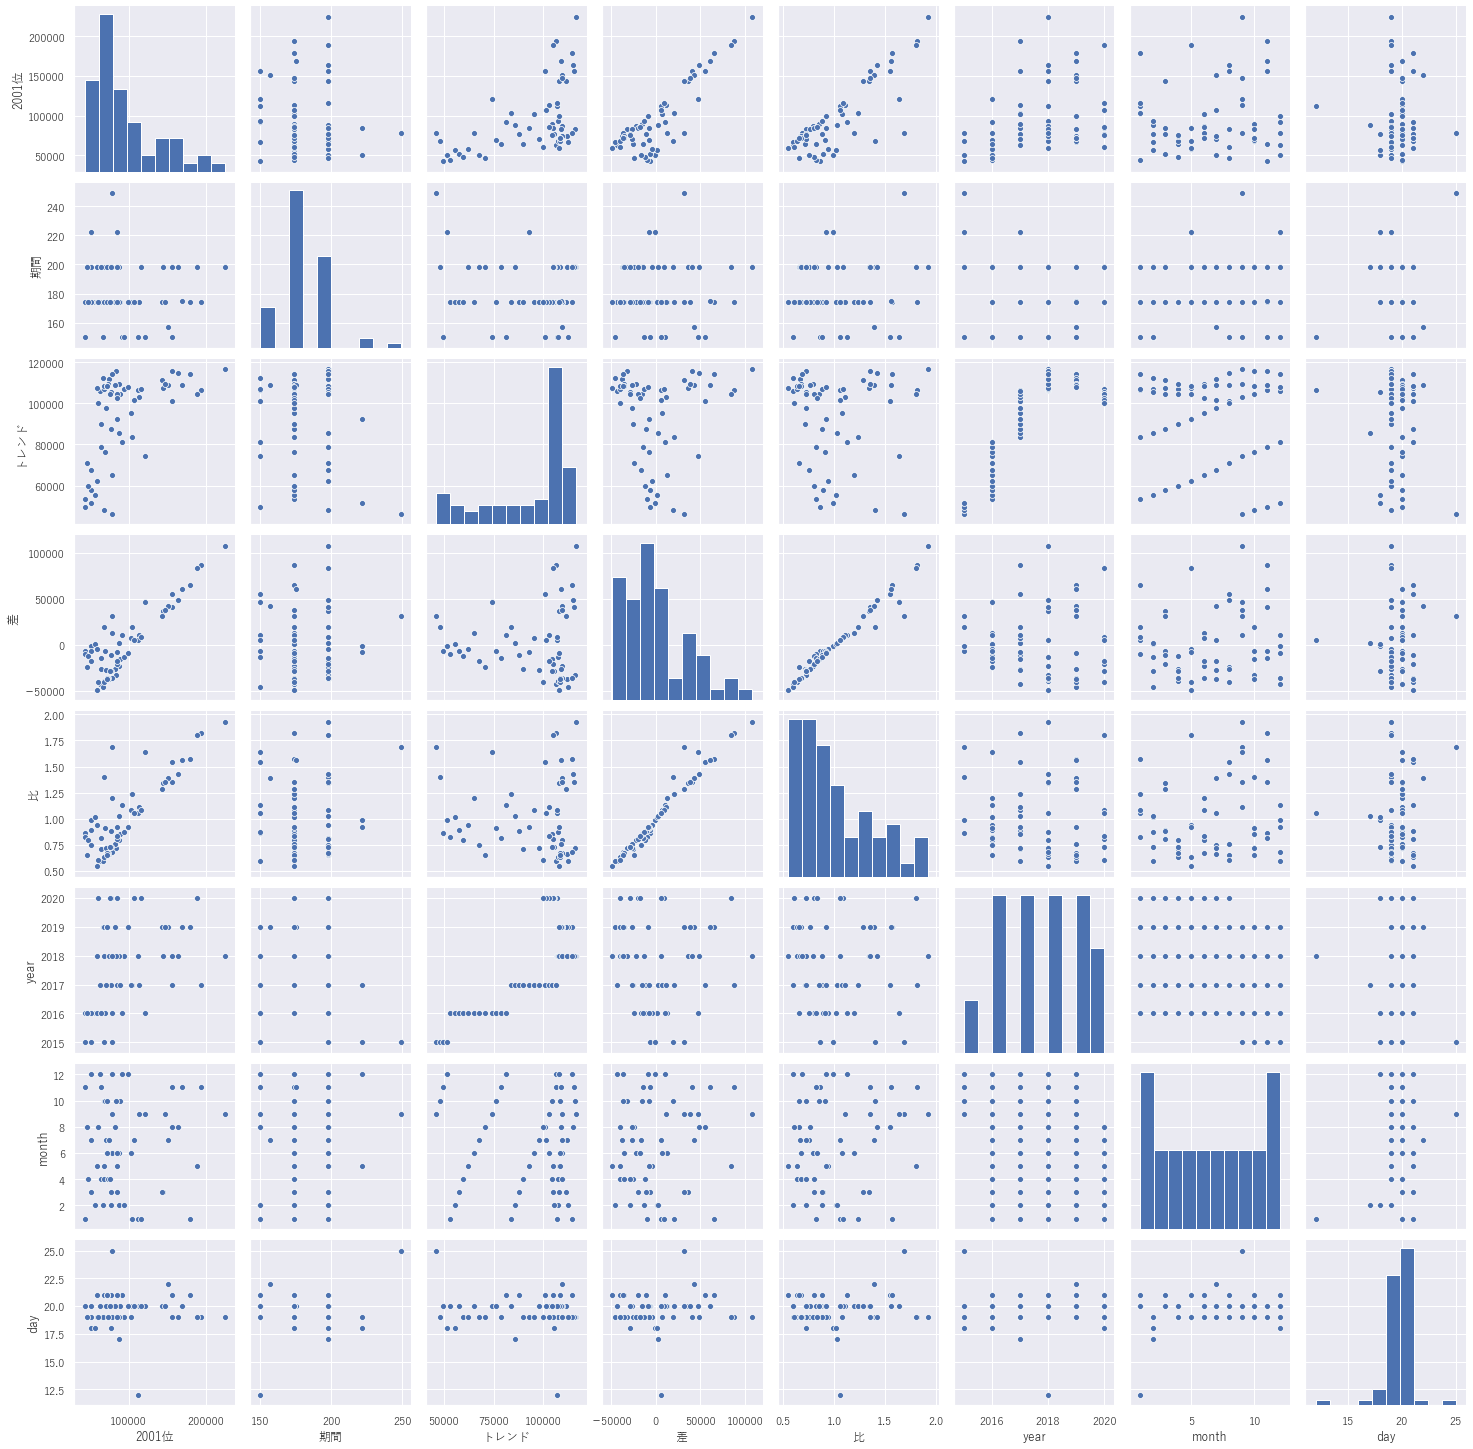

In [64]:
sns.set(font='Yu Gothic')
sns.pairplot(df)

## ランキング報酬データ

### ラインキング報酬アイドル

In [65]:
# 攻略wikiからコピペ
event_idol = {
    'アタシポンコツアンドロイド': ['安部菜々'],
    'Nation Blue': ['高垣楓'],
    'Orange Sapphire': ['城ヶ崎美嘉'],
    'Snow Wings': ['大槻唯'],
    'パステルピンクな恋': ['小早川紗枝'],
    'オルゴールの小箱': ['アナスタシア'],
    '絶対特権主張しますっ！': ['十時愛梨'],
    'つぼみ': ['一ノ瀬志希'],
    '明日また会えるよね': ['櫻井桃華'],
    '咲いてJewel': ['鷺沢文香'],
    'きみにいっぱい☆': ['姫川友紀'],
    'Near to You': ['片桐早苗'],
    'ラブレター': ['島村卯月'],
    'Jet to the Future': ['多田李衣菜'],
    'Flip Flop': ['日野茜'],
    'あんきら!?狂騒曲': ['双葉杏'],
    'Lunatic Show': ['白坂小梅'],
    '情熱ファンファンファーレ': ['本田未央'],
    '∀NSWER': ['早坂美玲'],
    'Nocturne': ['川島瑞樹'],
    'モーレツ★世直しギルティ！': ['堀裕子'],
    'Yes！ Party Time！！': ['櫻井桃華'],
    'Kawaii make MY day！': ['椎名法子'],
    '双翼の独奏歌': ['神崎蘭子'],
    'Twin☆くるっ★テール': ['城ヶ崎美嘉'],
    'Halloween♥Code': ['乙倉悠貴'],
    'Trinity Field': ['北条加蓮'],
    '冬空プレシャス': ['姫川友紀'],
    '美に入り彩を穿つ': ['塩見周子'],
    'Frost': ['神谷奈緒'],
    'キラッ！満開スマイル': ['島村卯月'],
    'Spring Screaming': ['喜多見柚', '龍崎薫'],
    'HARURUNRUN': ['棟方愛海', '水本ゆかり'],
    'エチュードは1曲だけ': ['三船美優', '上条春菜'],
    'SUN♡FLOWER': ['諸星きらり', '城ヶ崎美嘉'],
    'クレイジークレイジー': ['宮本フレデリカ', '一ノ瀬志希'],
    'Pretty Liar': ['速水奏', '高垣楓'],
    'アンデッド・ダンスロック': ['松永涼', '白坂小梅'],
    'Sunshine See May': ['依田芳乃', '藤原肇'],
    'Trust me': ['南条光', '喜多日菜子'],
    'スパイスパラダイス': ['高森藍子', '日野茜'],
    'Needle Light': ['上条春菜', '荒木比奈'],
    '未完成の歴史': ['二宮飛鳥', '北条加蓮'],
    'きゅん・きゅん・まっくす': ['椎名法子', '棟方愛海'],
    'Max Beat': ['大和亜季', '鷹富士茄子'],
    'TAKAMARI☆CLIMAXXX！！！！！': ['喜多見柚', '南条光'],
    'バベル ': ['一ノ瀬志希', '二宮飛鳥'],
    'comic cosmic': ['中野有香', '久川颯'],
    'ステップ＆スキップ': ['森久保乃々', '白菊ほたる'],
    '空想探査計画': ['木村夏樹', '浜口あやめ'],
    'Secret Daybreak': ['新田美波', '速水奏'],
    'ギュっとMilky Way': ['佐久間まゆ', '喜多日菜子'],
    '幸せの法則 ～ルール～': ['鷹富士茄子', '白菊ほたる'],
    '印象': ['浜口あやめ', '三船美優'],
    '輝け！ビートシューター ': ['的場梨沙', '結城晴'],
    'Athanasia': ['ナターリア', '小早川紗枝'],
    '不埒なCANVAS': ['輿水幸子', '塩見周子'],
    'Sing the Prologue♪': ['久川凪', '三村かな子'],
    '太陽の絵の具箱': ['緒方智絵里', '佐城雪美'],
    'ヒーローヴァーサスレイナンジョー': ['小関麗奈', '南条光'],
}

In [66]:
events = []
idols = []
for event, values in event_idol.items():
    for idol in values:
        events.append(event)
        idols.append(idol)

In [67]:
df_event_idol = pd.DataFrame({
    'イベント': events,
    '報酬アイドル': idols
})
df_event_idol

,イベント,報酬アイドル
0,アタシポンコツアンドロイド,安部菜々
1,Nation Blue,高垣楓
2,Orange Sapphire,城ヶ崎美嘉
3,Snow Wings,大槻唯
4,パステルピンクな恋,小早川紗枝
...,...,...
84,Sing the Prologue♪,三村かな子
85,太陽の絵の具箱,緒方智絵里
86,太陽の絵の具箱,佐城雪美
87,ヒーローヴァーサスレイナンジョー,小関麗奈


### あああ

## 所感

* aaa